# Reply on the feedback of Lab 5

Now I realize I learnt shit on the regression (at least the OLS things). My workflow handling with OLS has been deeply simplified by `scikit-learn` and `statsmodels`. 

## On the `web doc`

I opensourced all labs with questions and solutions on my GitHub repository. Compared with PDFs we daily entacted with, web version can be updated anytime even after I published it. The flexbility underneth HTML I believe is a shift of how we produce knowledge in the academia. 

## On the 

# Context
An instructor of EDUC8009 noticed that a lot of students became very stressed about this course, so he designed a questionnaire to measure their fear of statistics. Each item was a statement followed by a five-point Likert scale: 

1 = strongly disagree, 2 = disagree, 3 = neither agree nor disagree, 4 = agree, 5 = strongly agree. 

Note that only item 2 is reverse-scored. The data are saved in `fear.sav`.

# Objectives
1. Compute Cronbach’s alpha of all the items but item 2. Is the reliability high?
2. If you can delete an item to improve the scale, which item will you delete? Why?
3. To compute Cronbach’s alpha of all the items, we need recode item 2 first. Describe the distribution of the new variable you just generated.
4. Compute Cronbach’s alpha of all the items in the scale.

# Solutions

## Talk is cheap. Let's face the `fear`. 

In [67]:
import pandas as pd

fear_df = pd.read_spss('./datasets/fear.sav', convert_categoricals=False)

In [52]:
# Shape of the 'fear'
print(f'Rows vs Columns: ', fear_df.shape)

# Columns include in this dataset
print(f'Name of columns: ', fear_df.columns)

# Describe it!
print(f'Description: \n', fear_df.describe())

Rows vs Columns:  (2571, 8)
Name of columns:  Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8'], dtype='object')
Description: 
                 Q1           Q2           Q3           Q4           Q5  \
count  2571.000000  2571.000000  2571.000000  2571.000000  2571.000000   
mean      3.483469     3.481136     3.471023     3.465189     3.494360   
std       0.986297     0.990585     0.994262     1.000707     0.981674   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.000000     3.000000     3.000000     3.000000     3.000000   
50%       4.000000     4.000000     3.000000     3.000000     4.000000   
75%       4.000000     4.000000     4.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

                Q6           Q7           Q8  
count  2571.000000  2571.000000  2571.000000  
mean      3.473357     3.498639     3.475690  
std       0.982913     0.998588     0.978212  
min       1.

$N = 2571$? That's a really large amount of sample (for students who has taken a single PhD level lecture). I think the whole FED doesn't have this amount of PhD student. Just kidding. 

I then visualized the Likert-scale:  

/usr/local/python/3.12.1/lib/python3.12/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/usr/local/python/3.12.1/lib/python3.12/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


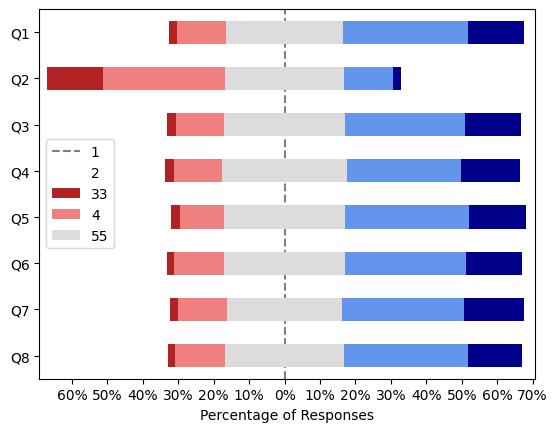

In [78]:
# Better to visualize the data: 

import matplotlib.pyplot as plt
import seaborn as sns

import plot_likert
# fear_scales_agree = ['Strongly Disagree', 'Disagree', 'Neither', 'Agree', 'Strongly agree']
plot = plot_likert.plot_likert(fear_df, fear_scales_agree, plot_percentage=True)
plot.legend(['1', '2', '33', '4', '55'])
plt.show()

## Q1: Cronbach’s $\alpha$ for all items (except item 2)

**Answer**



**Solution**



In [59]:
import pingouin as pg

# Drop item 2

fear_df_item2_excluded = fear_df.drop('Q2', axis=1)
cronbach_alpha = pg.cronbach_alpha(data=fear_df_item2_excluded)
print(cronbach_alpha)

(np.float64(0.6873382583349454), array([0.669, 0.705]))


In [62]:
def cronbach_alpha(df):
    item_variances = df.var(ddof=1)  # Item variances
    item_covariances = df.cov(ddof=1).mean().mean()  # Average covariance between items
    
    N = df.shape[1]  # Number of items
    return (N / (N - 1)) * (item_covariances / item_variances.mean())

# Calculate Cronbach's alpha for the items excluding item 2
alpha = cronbach_alpha(fear_df_item2_excluded)
print(f"Cronbach's alpha: {alpha:.3f}")

Cronbach's alpha: 0.406


In [63]:
# Calculate item-total correlations
def item_total_correlation(df):
    # Calculate the total score for each student (excluding each item one by one)
    total_score = df.sum(axis=1)
    correlations = {}
    
    for item in df.columns:
        # Exclude the current item from the total score for correlation calculation
        total_excluding_item = total_score - df[item]
        correlation = df[item].corr(total_excluding_item)
        correlations[item] = correlation
    
    return correlations

# Calculate the Cronbach's alpha after deleting each item
def cronbach_alpha_with_deletion(df):
    alphas = {}
    for item in df.columns:
        df_without_item = df.drop(item, axis=1)
        alpha = cronbach_alpha(df_without_item)
        alphas[item] = alpha
    return alphas

# Calculate item-total correlation
item_correlations = item_total_correlation(fear_df_item2_excluded)
print("Item-Total Correlations:")
print(item_correlations)

# Calculate Cronbach's alpha for each item deletion
alphas_with_deletion = cronbach_alpha_with_deletion(fear_df_item2_excluded)
print("\nCronbach's Alpha for Item Deletion:")
print(alphas_with_deletion)

# Find the item that would improve the alpha the most if deleted
best_item_to_delete = max(alphas_with_deletion, key=alphas_with_deletion.get)
print(f"\nThe item that would improve Cronbach's alpha the most if deleted: {best_item_to_delete}")


Item-Total Correlations:
{'Q1': np.float64(0.32493144386994754), 'Q3': np.float64(0.44890601739301983), 'Q4': np.float64(0.47260600036372685), 'Q5': np.float64(0.2592530237967405), 'Q6': np.float64(0.36566649644104926), 'Q7': np.float64(0.4267725068168655), 'Q8': np.float64(0.4771813045149253)}

Cronbach's Alpha for Item Deletion:
{'Q1': np.float64(0.45454903738314445), 'Q3': np.float64(0.42736302559869555), 'Q4': np.float64(0.4222345985572608), 'Q5': np.float64(0.46946708062658704), 'Q6': np.float64(0.4454330283299757), 'Q7': np.float64(0.43208405299526836), 'Q8': np.float64(0.4216744130494865)}

The item that would improve Cronbach's alpha the most if deleted: Q5


In [68]:
fear_df_rev = fear_df
fear_df_rev['Q2'] = 6 - fear_df_rev['Q2']

/usr/local/python/3.12.1/lib/python3.12/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/usr/local/python/3.12.1/lib/python3.12/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


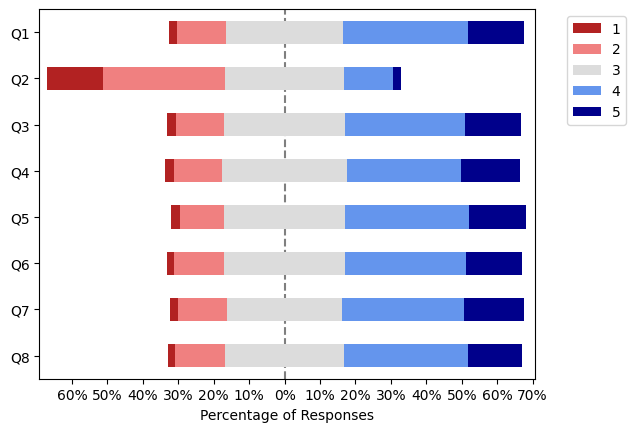

In [69]:
fear_scales_agree = [1, 2, 3, 4, 5]
plot_likert.plot_likert(fear_df_rev, fear_scales_agree, plot_percentage=True)
plt.show()

In [73]:
cronbach_alpha(fear_df_rev)

np.float64(0.37471197281309476)

In [76]:
pg.cronbach_alpha(data=fear_df_rev)

(np.float64(0.7071483372463728), array([0.69 , 0.724]))